In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\UniProjects\\DataSci\\final\\data\\PEMS-BAY.csv")
df.head()

,Unnamed: 0,400001,400017,400030,400040,400045,400052,400057,400059,400065,...,409525,409526,409528,409529,413026,413845,413877,413878,414284,414694
0,2017-01-01 00:00:00,71.4,67.8,70.5,67.4,68.8,66.6,66.8,68.0,66.8,...,68.8,67.9,68.8,68.0,69.2,68.9,70.4,68.8,71.1,68.0
1,2017-01-01 00:05:00,71.6,67.5,70.6,67.5,68.7,66.6,66.8,67.8,66.5,...,68.4,67.3,68.4,67.6,70.4,68.8,70.1,68.4,70.8,67.4
2,2017-01-01 00:10:00,71.6,67.6,70.2,67.4,68.7,66.1,66.8,67.8,66.2,...,68.4,67.4,68.4,67.5,70.2,68.3,69.8,68.4,70.5,67.9
3,2017-01-01 00:15:00,71.1,67.5,70.3,68.0,68.5,66.7,66.6,67.7,65.9,...,68.5,67.5,68.5,67.5,70.4,68.7,70.2,68.4,70.8,67.6
4,2017-01-01 00:20:00,71.7,67.8,70.2,68.1,68.4,66.9,66.1,67.7,66.1,...,68.5,67.7,68.5,67.4,69.6,69.1,70.0,68.4,71.0,67.9


In [3]:
#naming the unnamed column as timestamp
df.rename(columns={df.columns[0]: 'timestamp'}, inplace=True)

In [4]:
#setting the timestamp as the index
df.set_index('timestamp', inplace=True)
df.index=pd.to_datetime(df.index)
df.head()

,400001,400017,400030,400040,400045,400052,400057,400059,400065,400069,...,409525,409526,409528,409529,413026,413845,413877,413878,414284,414694
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,71.4,67.8,70.5,67.4,68.8,66.6,66.8,68.0,66.8,69.0,...,68.8,67.9,68.8,68.0,69.2,68.9,70.4,68.8,71.1,68.0
2017-01-01 00:05:00,71.6,67.5,70.6,67.5,68.7,66.6,66.8,67.8,66.5,68.2,...,68.4,67.3,68.4,67.6,70.4,68.8,70.1,68.4,70.8,67.4
2017-01-01 00:10:00,71.6,67.6,70.2,67.4,68.7,66.1,66.8,67.8,66.2,67.8,...,68.4,67.4,68.4,67.5,70.2,68.3,69.8,68.4,70.5,67.9
2017-01-01 00:15:00,71.1,67.5,70.3,68.0,68.5,66.7,66.6,67.7,65.9,67.8,...,68.5,67.5,68.5,67.5,70.4,68.7,70.2,68.4,70.8,67.6
2017-01-01 00:20:00,71.7,67.8,70.2,68.1,68.4,66.9,66.1,67.7,66.1,67.8,...,68.5,67.7,68.5,67.4,69.6,69.1,70.0,68.4,71.0,67.9


In [5]:
null_val=df.isnull().sum()

if null_val.sum()==0:
    print("No null values on the dataset")

No null values on the dataset


### Outlier Detection with Turkey's fences method

In [6]:
#outlier detection using Turkey's fences (IQR with threshold)
thres=1.5 #standard threshold

#creating a datafram with the outliers using the same index
df_outliers = pd.DataFrame(index=df.index)

for sensor in df.columns:
    #calculating the quantiles
    q1 = df[sensor].quantile(0.25)
    q3 = df[sensor].quantile(0.75)
    IQR = q3 - q1
    
    #calculating the boundaries
    lower = q1 - (thres * IQR)
    upper = q1 + (thres * IQR)
    
    #if the value is considered an outlier the cell will have the value True
    df_outliers[sensor] = (df[sensor] < lower) | (df[sensor] > upper)
df_outliers.head()

C:\Users\nikos\AppData\Local\Temp\ipykernel_12756\2830981425.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_outliers[sensor] = (df[sensor] < lower) | (df[sensor] > upper)
C:\Users\nikos\AppData\Local\Temp\ipykernel_12756\2830981425.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_outliers[sensor] = (df[sensor] < lower) | (df[sensor] > upper)
C:\Users\nikos\AppData\Local\Temp\ipykernel_12756\2830981425.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

,400001,400017,400030,400040,400045,400052,400057,400059,400065,400069,...,409525,409526,409528,409529,413026,413845,413877,413878,414284,414694
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,False,True,False,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,False,False,False
2017-01-01 00:05:00,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
2017-01-01 00:10:00,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
2017-01-01 00:15:00,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
2017-01-01 00:20:00,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False


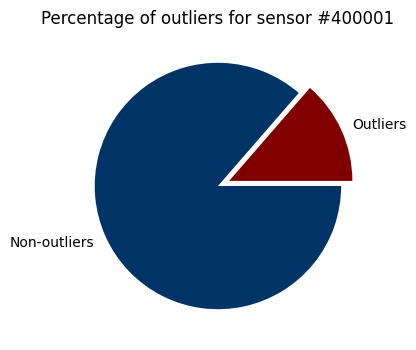

In [7]:
true_percentage = df_outliers['400001'].mean()*100
false_percentage = 100 - true_percentage
labels=['Outliers', 'Non-outliers']
colors=['maroon', '#003366']
explode = (0.1,0)

plt.figure(figsize=(4,4))
plt.pie([true_percentage, false_percentage], labels=labels, colors=colors, explode=explode)
plt.title('Percentage of outliers for sensor #400001')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

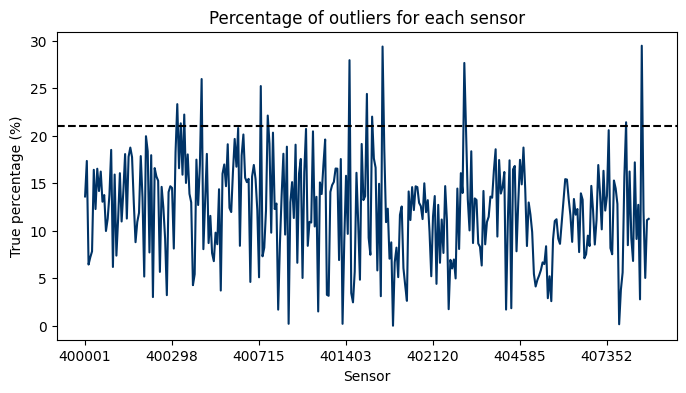

In [8]:
true_percentage_df = df_outliers.mean()*100

plt.figure(figsize=(8,4))
true_percentage_df.plot(kind='line', color='#003366')
plt.title('Percentage of outliers for each sensor')
plt.axhline(y=21, color='black', linestyle='--')
plt.xlabel('Sensor')
plt.ylabel('True percentage (%)')
plt.show

#### Replacing outliers with median value

In [9]:
median_val = df.median()
new_df = pd.DataFrame()
new_df = df.where(~df_outliers, median_val, axis=1)
new_df.head()

,400001,400017,400030,400040,400045,400052,400057,400059,400065,400069,...,409525,409526,409528,409529,413026,413845,413877,413878,414284,414694
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,71.4,64.0,70.5,67.4,68.8,66.6,66.8,68.0,66.8,69.0,...,68.8,65.1,68.8,61.6,69.2,60.9,70.4,68.8,71.1,68.0
2017-01-01 00:05:00,71.6,64.0,70.6,67.5,68.7,66.6,66.8,67.8,66.5,68.2,...,68.4,67.3,68.4,61.6,70.4,60.9,70.1,68.4,70.8,67.4
2017-01-01 00:10:00,71.6,64.0,70.2,67.4,68.7,66.1,66.8,67.8,66.2,67.8,...,68.4,67.4,68.4,61.6,70.2,60.9,69.8,68.4,70.5,67.9
2017-01-01 00:15:00,71.1,64.0,70.3,68.0,68.5,66.7,66.6,67.7,65.9,67.8,...,68.5,67.5,68.5,61.6,70.4,60.9,70.2,68.4,70.8,67.6
2017-01-01 00:20:00,71.7,64.0,70.2,68.1,68.4,66.9,66.1,67.7,66.1,67.8,...,68.5,67.7,68.5,61.6,69.6,60.9,70.0,68.4,71.0,67.9


In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52116 entries, 2017-01-01 00:00:00 to 2017-06-30 23:55:00
Columns: 325 entries, 400001 to 414694
dtypes: float64(325)
memory usage: 129.6 MB


### Data Normalization with MinMaxScaler

In [11]:
from sklearn.preprocessing import MinMaxScaler

#extracting the columns that need normalizing
norm_col = new_df.select_dtypes(include='float64').columns
#extracting the timestamp
timestamp_idx = new_df.index
scaler = MinMaxScaler()
new_df[norm_col] = scaler.fit_transform(new_df[norm_col])
new_df.index = timestamp_idx

new_df.head()

,400001,400017,400030,400040,400045,400052,400057,400059,400065,400069,...,409525,409526,409528,409529,413026,413845,413877,413878,414284,414694
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0.841667,0.709302,0.953704,0.822581,0.813889,0.716216,0.855932,0.887755,0.818182,0.923077,...,0.858407,0.666667,0.971963,0.705128,0.815029,0.715278,0.833333,0.893333,0.901961,0.869565
2017-01-01 00:05:00,0.858333,0.709302,0.956790,0.826613,0.811111,0.716216,0.855932,0.867347,0.790909,0.879121,...,0.823009,0.948718,0.934579,0.705128,0.884393,0.715278,0.802083,0.866667,0.872549,0.804348
2017-01-01 00:10:00,0.858333,0.709302,0.944444,0.822581,0.811111,0.648649,0.855932,0.867347,0.763636,0.857143,...,0.823009,0.961538,0.934579,0.705128,0.872832,0.715278,0.770833,0.866667,0.843137,0.858696
2017-01-01 00:15:00,0.816667,0.709302,0.947531,0.846774,0.805556,0.729730,0.847458,0.857143,0.736364,0.857143,...,0.831858,0.974359,0.943925,0.705128,0.884393,0.715278,0.812500,0.866667,0.872549,0.826087
2017-01-01 00:20:00,0.866667,0.709302,0.944444,0.850806,0.802778,0.756757,0.826271,0.857143,0.754545,0.857143,...,0.831858,1.000000,0.943925,0.705128,0.838150,0.715278,0.791667,0.866667,0.892157,0.858696


In [18]:
def plot_daily_data(sensor_id, timestart, timeend):
    '''
    Args:
        sensor_id: string with the sensor id tha needs to be plotted
        timestart: string with the stamp of the starting time to plot (year-month-day hour:minute:00)
        timeend: string with the stamp of the ending time to plot (year-month-day hour:minute:00)
    Returns:
        plot of the daily data collected by one sensor
    '''
    new_df[sensor_id].loc[(new_df.index > timestart) & (new_df.index < timeend)].plot(figsize=(15,6), color='#003366',title='day of data')
    plt.show()

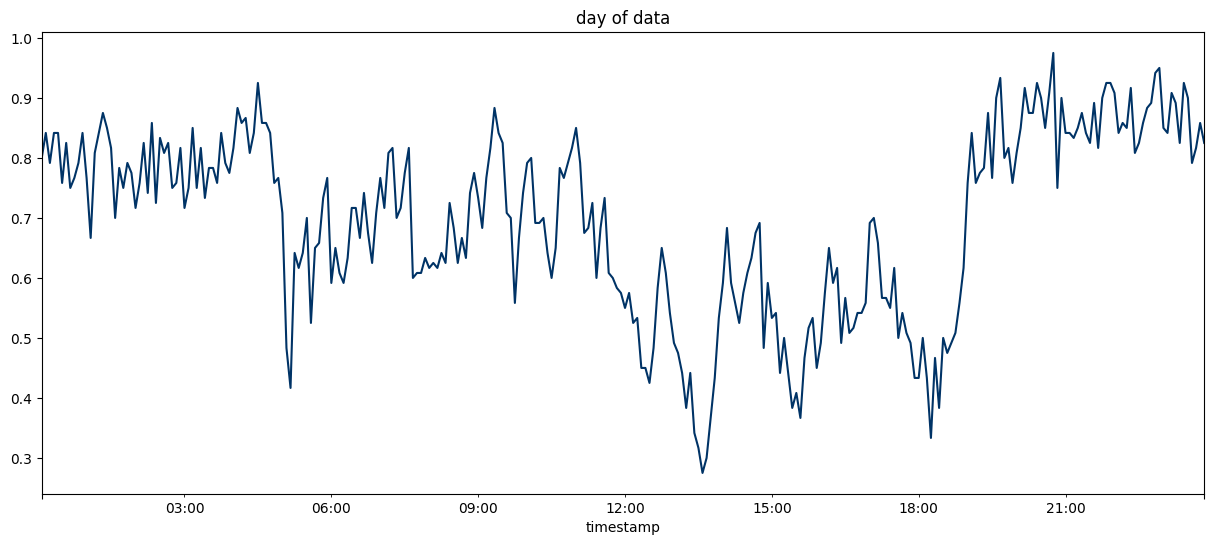

In [19]:
plot_daily_data('400001', '2017-03-25 00:00:00', '2017-03-25 23:55:00')

### Null value replacement in metadata, using front-fill method

In [20]:
df_meta = pd.read_csv('C:\\UniProjects\\DataSci\\final\\data\\PEMS-BAY-META.csv')
df_meta = df_meta.set_index('sensor_id')
df_meta.head()

,Fwy,Dir,District,County,City,State_PM,Abs_PM,Latitude,Longitude,Length,Type,Lanes,Name,User_ID_1,User_ID_2,User_ID_3,User_ID_4
sensor_id,,,,,,,,,,,,,,,,,
400649,17,N,4,85,44112.0,9.06,21.613,37.251741,-121.958118,0.850,ML,2,LARK AVE,DT185,L2-N-37-017-00906,998009,417770
400715,17,N,4,85,44112.0,9.4,21.953,37.256205,-121.955355,0.245,ML,2,SB 85 rm-n-conn,DT244,L2-N-37-017-00940,998013,417774
400240,17,N,4,85,44112.0,9.55,22.103,37.258184,-121.953853,0.535,ML,3,NB 85 rm-n-conn,DT260,L3-N-37-017-00955,998017,420767
403329,17,N,4,85,10340.0,10.47,23.023,37.270267,-121.947353,0.510,ML,3,Camden ave rm-n-loop,DTB25,L3-N-37-017-01047,997278,430594
400436,17,N,4,85,10340.0,10.57,23.123,37.271687,-121.947037,0.905,ML,3,Camden Ave rm-n-diag,DT267,l3-N-37-017-01057,998021,420772


In [21]:
df_meta.isnull().sum()

Fwy           0
Dir           0
District      0
County        0
City         27
State_PM      0
Abs_PM        0
Latitude      0
Longitude     0
Length        0
Type          0
Lanes         0
Name          0
User_ID_1     0
User_ID_2     0
User_ID_3     0
User_ID_4     0
dtype: int64

In [22]:
#front-filling the missing values
df_meta['City'] = df_meta['City'].fillna(method='ffill')
df_meta.head()

,Fwy,Dir,District,County,City,State_PM,Abs_PM,Latitude,Longitude,Length,Type,Lanes,Name,User_ID_1,User_ID_2,User_ID_3,User_ID_4
sensor_id,,,,,,,,,,,,,,,,,
400649,17,N,4,85,44112.0,9.06,21.613,37.251741,-121.958118,0.850,ML,2,LARK AVE,DT185,L2-N-37-017-00906,998009,417770
400715,17,N,4,85,44112.0,9.4,21.953,37.256205,-121.955355,0.245,ML,2,SB 85 rm-n-conn,DT244,L2-N-37-017-00940,998013,417774
400240,17,N,4,85,44112.0,9.55,22.103,37.258184,-121.953853,0.535,ML,3,NB 85 rm-n-conn,DT260,L3-N-37-017-00955,998017,420767
403329,17,N,4,85,10340.0,10.47,23.023,37.270267,-121.947353,0.510,ML,3,Camden ave rm-n-loop,DTB25,L3-N-37-017-01047,997278,430594
400436,17,N,4,85,10340.0,10.57,23.123,37.271687,-121.947037,0.905,ML,3,Camden Ave rm-n-diag,DT267,l3-N-37-017-01057,998021,420772


In [23]:
#saving the dataframes
new_df.to_csv('C:/UniProjects/DataSci/final/data/0-data-preprocessed.csv', index=True)
df_meta.to_csv('C:/UniProjects/DataSci/final/data/0-data-preprocessed-meta.csv', index=True)